### Importing Packages and Uploading Playlist Dataset

In [1]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Load your data
df = pd.read_csv(r'data/2023_playlist.csv')


### Pre-Processing

In [36]:
# Select and normalize relevant features
selected_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
scaler = MinMaxScaler()
X = scaler.fit_transform(df[selected_features])

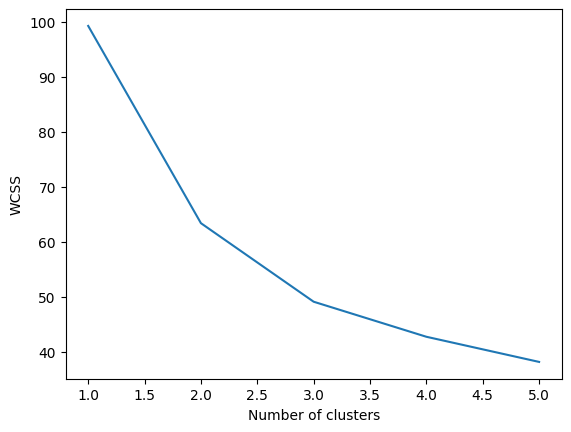

In [37]:
# Using the Elbow method to select the number of clusters
wcss = [] 
for i in range(1, 6): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 6), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


- This shows the optimal number of clusters to choose is 3, as choosing any more does not capture much more variance within the clusters

### Performing K-Means Clustering

In [38]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.predict(X)

# Create a DataFrame for the normalized features
normalized_df = pd.DataFrame(X, columns=selected_features)
normalized_df['Cluster'] = df['Cluster']


In [39]:
# Adding track_name and artist as labels so I can identify which songs are in each cluster

normalized_df['track_name'] = df['track_name']
normalized_df['artist'] = df['artist']


column_order = ['track_name', 'artist'] + selected_features + ['Cluster']
normalized_df = normalized_df.reindex(columns=column_order)

In [45]:
normalized_df['Cluster'] = normalized_df['Cluster'].apply(lambda x: x + 1)
normalized_df

,track_name,artist,danceability,energy,loudness,valence,tempo,Cluster
0,船窓,Emerson Kitamura,0.721931,0.290874,0.484130,0.039736,0.568746,1
1,I Found What I've Been Searching For,La'Verne Washington,0.556139,0.694781,0.849652,0.481707,0.685818,2
2,"Good Thoughts, Bad Thoughts",Funkadelic,0.417629,0.300031,0.417753,0.297764,0.495996,1
3,Such a Feeling,Aurra,0.804827,0.786347,0.779756,0.719512,0.495354,3
4,High John,MAVI,0.571878,0.538102,0.669013,0.667683,0.781463,3
...,...,...,...,...,...,...,...,...
506,Future Perfect,The Durutti Column,0.764953,0.434327,0.363900,0.527439,0.458530,2
507,Dance Yourself Free,Rebecca Vasmant,0.520462,0.953200,0.859346,0.748984,0.531940,3
508,I Am Stretched on Your Grave,Sinéad O'Connor,0.747114,0.654085,0.737011,0.556911,0.430924,3
509,Rotations,Ebende,0.846800,0.842303,0.633996,0.850610,0.587096,3


### Visualising Results

##### Let's get visualising!

In [64]:
# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(normalized_df, x='energy', y='danceability', z='loudness', color='Cluster',
                    title='My 2023 New Finds Playlist KMeans Clusters')


fig.update_traces(marker=dict(size=3))  # Set a specific size for all points
fig.update_layout(
    scene = dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Loudness'
    ),
    title={
        'text': "My 2023 New Finds Playlist KMeans Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, b=0, t=40),  # Adjusting margins for better view
    width=1200,
    height=800
)

# Show the plot
fig.show()


In [107]:
# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(normalized_df, x='energy', y='danceability', z='valence', color='Cluster',
                    title='My 2023 New Finds Playlist KMeans Clusters')


fig.update_traces(marker=dict(size=3))  # Set a specific size for all points
fig.update_layout(
    scene = dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Valence'
    ),
    title={
        'text': "My '2023 New Finds' Playlist - KMeans Clusters",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, b=0, t=40),  # Adjusting margins for better view
    width=1200,
    height=800
)

# Show the plot
fig.show()


In [66]:
# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(normalized_df, x='energy', y='danceability', z='tempo', color='Cluster',
                    title='My 2023 New Finds Playlist KMeans Clusters')


fig.update_traces(marker=dict(size=3))  # Set a specific size for all points
fig.update_layout(
    scene = dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Tempo'
    ),
    title={
        'text': "My 2023 New Finds Playlist KMeans Clusters",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, b=0, t=40),  # Adjusting margins for better view
    width=1200,
    height=800
)

# Show the plot
fig.show()


- From the 3 visualisations, when the 3 clusters are mapped with 'Valence' as the z axis in addition to 'Energy' and 'Danceability' -> the 3 clusters are much more clearly separated
- This suggests Valence is an important feature

In [50]:
normalized_df

,track_name,artist,danceability,energy,loudness,valence,tempo,Cluster
0,船窓,Emerson Kitamura,0.721931,0.290874,0.484130,0.039736,0.568746,1
1,I Found What I've Been Searching For,La'Verne Washington,0.556139,0.694781,0.849652,0.481707,0.685818,2
2,"Good Thoughts, Bad Thoughts",Funkadelic,0.417629,0.300031,0.417753,0.297764,0.495996,1
3,Such a Feeling,Aurra,0.804827,0.786347,0.779756,0.719512,0.495354,3
4,High John,MAVI,0.571878,0.538102,0.669013,0.667683,0.781463,3
...,...,...,...,...,...,...,...,...
506,Future Perfect,The Durutti Column,0.764953,0.434327,0.363900,0.527439,0.458530,2
507,Dance Yourself Free,Rebecca Vasmant,0.520462,0.953200,0.859346,0.748984,0.531940,3
508,I Am Stretched on Your Grave,Sinéad O'Connor,0.747114,0.654085,0.737011,0.556911,0.430924,3
509,Rotations,Ebende,0.846800,0.842303,0.633996,0.850610,0.587096,3


In [54]:
cluster_avg = normalized_df.groupby('Cluster').mean()
cluster_avg

/var/folders/65/2ht76krj4kl36j1_kgx_rp2w0000gq/T/ipykernel_19467/254491931.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,danceability,energy,loudness,valence,tempo
Cluster,,,,,
1,0.378585,0.215714,0.428727,0.191518,0.485643
2,0.617125,0.628070,0.695911,0.342126,0.540333
3,0.726848,0.667571,0.712257,0.748422,0.557812


#### Randomizer: Choosing 5 random tracks from each cluster

In [99]:
# Join the normalized_df with the original df to get the popularity rating
df_combined = pd.merge(normalized_df, df[['popularity', 'track_name']], left_on='track_name', right_on='track_name', how='inner')

# Identify the most popular tracks in each cluster
top_tracks = df_combined.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)


# Display the DataFrame with the top tracks in each cluster
for cluster, data in top_tracks.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data[['track_name','artist']])
    print('-' * 40)  # Add a line to separate clusters

Cluster 1:
        track_name                     artist
0  Nightmare Paint      Oneohtrix Point Never
1               船窓           Emerson Kitamura
2    Mother's Love  Emahoy Tsege Mariam Gebru
3        In Spring          Tara Clerkin Trio
4             FEEL                       IZCO
----------------------------------------
Cluster 2:
           track_name         artist
5      Double Rapture            Sis
6  Darkness, Darkness  Kieran Hebden
7        Cold Blooded       Overmono
8           Fall Back    James Blake
9       What You Say?    Young Marco
----------------------------------------
Cluster 3:
           track_name                          artist
10       Mas Que Nada                          Patato
11  Yinne Te Yelle Be  Alogte Oho & His Sounds of Joy
12         Good Thing                     James Mason
13       Inside Minds                        Resavoir
14       Atwer Abroba                      Ebo Taylor
----------------------------------------


#### ...from the random selections, the results qualitatively match the quantitiative cluster analysis!
- Cluster 1 songs are much more laid back, more suitable for individual listening and probably more melodic
- Cluster 2 songs tend to be more electronic music, high tempo and slightly darker and moody than the songs in cluster 3 (or at least less joyful)
- Cluster 3 songs tend to be more joyful, jazzy and funky - much more of a sunny day playlist!

In [103]:
# Join the normalized_df with the original df to get the popularity rating
df_combined = pd.merge(normalized_df, df[['popularity', 'track_name']], left_on='track_name', right_on='track_name', how='inner')

# Identify the most popular tracks in each cluster
top_tracks = df_combined.groupby('Cluster').apply(lambda x: x.sample(n=5, random_state=1)).reset_index(drop=True)


# Display the DataFrame with the top tracks in each cluster
for cluster, data in top_tracks.groupby('Cluster'):
    print(f"Cluster {cluster}:")
    print(data[['track_name','artist']])
    print('-' * 40)  # Add a line to separate clusters

Cluster 1:
                    track_name             artist
0               Summer Madness    Kool & The Gang
1  Just Like U Said It Would B    Sinéad O'Connor
2                    In Spring  Tara Clerkin Trio
3                       Tezeta         Time Wharp
4                  Three Drums           Four Tet
----------------------------------------
Cluster 2:
                                          track_name          artist
5                                           Theirs13          JGrrey
6                                   DiVine Ascension   muva of Earth
7  Can't Get Enough (feat. Rachel Chinouriri & Ve...        p-rallel
8                                         I Love You  Fontaines D.C.
9                                           Devotion      Arlo Parks
----------------------------------------
Cluster 3:
              track_name        artist
10  Ekobah - Dub Reprise  Franck Roger
11         Mixed Signals   S. Fidelity
12               Abidján  Ray Barretto
13          The